### Name: Anantharam(Ananth) Subramanian
### NLP Homework #6


In [2]:
#requires Tensorflow 2.0 and Tf-hub 0.7!!
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [1]:
import spacy
nlp = spacy.load("en_core_web_md")

In [6]:
print(tf.__version__)
print(hub.__version__)


2.0.0
0.7.0


Load up the ELMO model

In [22]:
module_url = "https://tfhub.dev/google/elmo/3"
embed = hub.load(module_url)

Example of how to get data from the model

In [26]:
text=tf.convert_to_tensor(["a","😊"])
out1 = embed.signatures['default'](text)['elmo']



In [28]:
cont1 = out1[0][1]
print(cont1)

InvalidArgumentError: slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [5]:
out1.shape

TensorShape([3, 7, 1024])

## Outputs

### The output dictionary contains:

  * word_emb: the character-based word representations with shape [batch_size, max_length, 512].
  * lstm_outputs1: the first LSTM hidden state with shape [batch_size, max_length, 1024].
  * lstm_outputs2: the second LSTM hidden state with shape [batch_size, max_length, 1024].
  * elmo: the weighted sum of the 3 layers, where the weights are trainable. This tensor has shape [batch_size, max_length, 1024]
  * default: a fixed mean-pooling of all contextualized word representations with shape [batch_size, 1024].


Q1:  Run a 4 words with different context meanings through Elmo--what is the (cosine) similarity of that word in the different contexts.

### Answer

### The sentences chosen are as follows:
### The crane flew away, Crane lifted the car, On the family way, Family of four children

In [13]:
text=tf.convert_to_tensor(["The crane flew away", "Crane lifted the car", "On the family way", "Family of four children"])
out = embed.signatures['default'](text)['elmo']

In [14]:
cont1_crane = out[0][1]

In [15]:
cont1_crane

<tf.Tensor: id=6349, shape=(1024,), dtype=float32, numpy=
array([-0.13877901, -0.29395956, -0.18235528, ..., -0.50222695,
       -0.17735893,  0.24674334], dtype=float32)>

In [16]:
cont2_crane = out[1][0]

In [17]:
cont1_family = out[2][2]

In [18]:
cont2_family = out[3][0]

In [19]:
import numpy as np
arr1_crane = np.array(cont1_crane)
arr2_crane = np.array(cont2_crane)
arr1_family = np.array(cont1_family)
arr2_family = np.array(cont2_family)

In [20]:
import math
len1 = 0
for i,v in enumerate(arr1_crane):
    len1 = len1 + ((v*v))
cont1_crane_len = math.sqrt(len1)   
print(cont1_crane_len)

17.147159199477066


In [21]:
len2 = 0
for i,v in enumerate(arr2_crane):
    len2 = len2 + ((v*v))
cont2_crane_len = math.sqrt(len2)   
print(cont2_crane_len)

14.78735638271689


In [22]:
len3 = 0
for i,v in enumerate(arr1_family):
    len3 = len3 + ((v*v))
cont1_family_len = math.sqrt(len3)   
print(cont1_family_len)

16.593458642690386


In [23]:
len4 = 0
for i,v in enumerate(arr2_family):
    len4 = len4 + ((v*v))
cont2_family_len = math.sqrt(len4)   
print(cont2_family_len)

18.046815770259872


In [24]:
length_prod_crane = (cont1_crane_len) * (cont2_crane_len)
print(length_prod_crane)

253.56115403384985


In [25]:
length_prod_family = (cont1_family_len) * (cont2_family_len)
print(length_prod_family)

299.4590911160598


In [26]:
dot_prod_crane = np.dot(arr1_crane,arr2_crane)
print(dot_prod_crane)

92.23171


In [27]:
dot_prod_family = np.dot(arr1_family,arr2_family)
print(dot_prod_family)

179.74829


In [28]:
cos_similar_crane = (dot_prod_crane)/(length_prod_crane)
print(cos_similar_crane)

0.3637454352688262


In [29]:
cos_similar_family = (dot_prod_family)/(length_prod_family)
print(cos_similar_family)

0.6002432263643012


### The cosine similarity for the word crane at two different contexts is around 0.36374.
### For the word family, the cosine similarity for different contexts is 0.6002

Q2:  Where is the padding?  Where does it go in the sequence?

### Answer

### Padding is explained by choosing two sentences one 4 words long and other 7 words long. ELMO does the job of adding the padding automatically and is evident from the output shape. The padding is added at the end of the smaller sentence and in this case to "Great way to collaborate".

In [30]:
text=tf.convert_to_tensor(["Great way to collaborate", "Great way to start the day"])
out1 = embed.signatures['default'](text)['elmo']

In [31]:
print(out1[0].shape)
print(out1[1].shape)

(6, 1024)
(6, 1024)


### The padding is added at the end of the sequence, ie. for the sentence "Great way to collaborate", the padding is added after collaborate to make up for the 2 additional words in the second sentence.

Q3 Describe how you would use an ELMO vector in a Neural Network below. Where does ELMO go? What else needs to be changed (added/removed)?

### I took the cue from one of the live sessions where the professor showed how we could use glove vector within the embedding layer of an LSTM and use it to train the weights. On similar lines, I have attempted to use ELMO vectors within the embedding layer of the LSTM below.
### Step 1: I first got the words from the glove vector and made a list of 5000 words
### Step 2: The words were then passed into tf.convert_to_tensor and got the corresponding ELMO vectors
### Step 4: The ELMO output is then converted into an array
### Step 5: An embedding matrix was created and this is passed to the weights parameter within the embedding layer of LSTM

### What is changed within the code? - Embedding vector length is changed tp 1024 to match with the ELMO output

### What is added within the model? - Within the embedding layer definition, parameter weights is added and the embedding matrix created in Step 5 is passed

In [32]:
import numpy as np
embeddings_index = dict()
total_words = []
f = open('C:\\Users\\anant\\Documents\\NLP\\glove.6B\\glove.6B.100d.txt','r',encoding='UTF-8')
for line in f:
    values = line.split()
    if len(total_words)<=4999:
        word = values[0]
        total_words.append(word)
f.close()

In [67]:
len(total_words)

5000

In [105]:
text=tf.convert_to_tensor(total_words)
out3 = embed.signatures['default'](text)['elmo']


In [116]:
out4 = np.array(out3)
print(out4.shape)
#out5 = np.arange(1024*5000).reshape(1024,5000)
#out5 = out5[np.newaxis, ...]
#out4 = np.squeeze(out5,axis=0)
#print(out4.shape)
embedding_matrix = np.zeros((5000, 1024))
for i in range(0,5000):
     embedding_matrix[i] = out4[i]
embedding_matrix.shape
embedding_matrix

(5000, 1, 1024)


array([[ 0.30815458,  0.26630402,  0.23561302, ...,  0.02818283,
         0.0464194 ,  0.28047854],
       [ 0.07256798,  0.00247018,  0.60593152, ...,  0.362905  ,
        -0.26421455,  0.2251651 ],
       [-0.46635216, -0.18451712, -0.12319498, ..., -0.08025207,
         0.03607745,  0.11280695],
       ...,
       [ 0.22425993, -0.36466366, -0.13002372, ...,  0.41463536,
        -0.03452775,  0.23039362],
       [ 0.16675907, -0.27973691,  0.3134284 , ...,  0.07983549,
         0.19537374,  0.08571871],
       [ 0.3321982 , -0.03619841,  0.73742741, ...,  0.0084485 ,
        -0.15265071, -0.36237717]])

In [ ]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  LSTM as LSTM, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
numpy.random.seed(7)
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
embedding_vecor_length = 1024

model2 = Sequential()
model2.add(Embedding(top_words, embedding_vecor_length,weights=[embedding_matrix],input_length=max_review_length))
model2.add(LSTM(500))
#I need to change LSTM to 512 so it is a power of 2
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 1024)         5120000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 500)               3050000   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 501       
Total params: 8,170,501
Trainable params: 8,170,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 16062s 642ms/sample - loss: 0.5531 - accuracy: 0.6952 - val_loss: 0.3695 - val_accuracy: 0.8321
Epoch 2/3
14464/25000 [================>.............] - ETA: 1:43:15 - loss: 0.2718 - accuracy: 0.8866

### The model was run in a Google Colab GPU and here is the output.

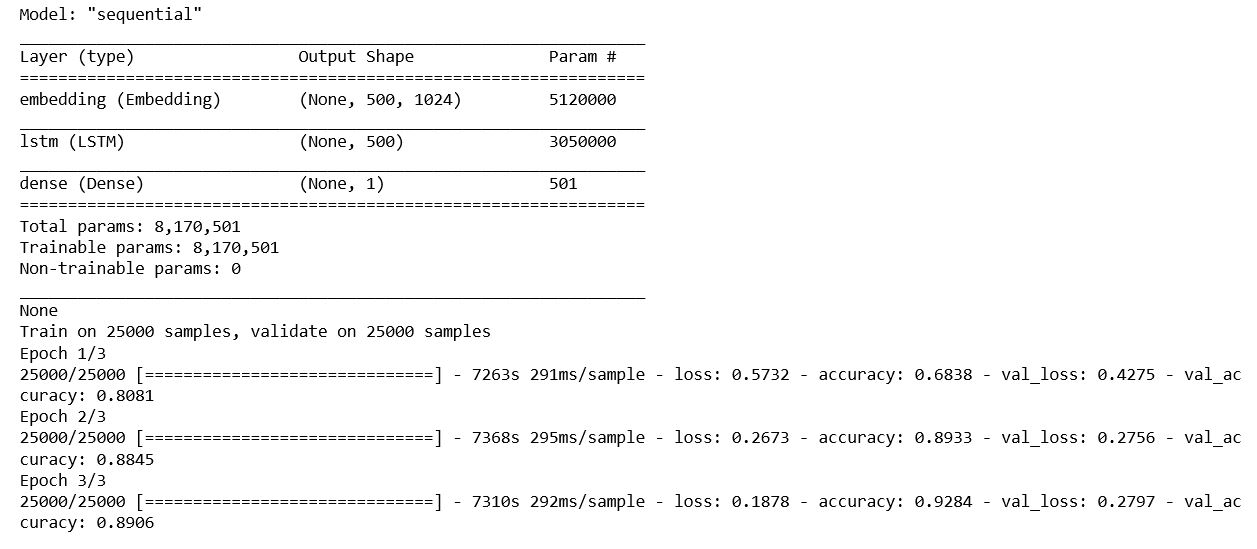

In [33]:
from IPython.display import Image
Image(filename = "C:\\Users\\anant\\Documents\\NLP\\hw6\\colab_output_lstm_elmo.JPG", width=500, height=500)

Q4 Compare the size of elmo vectors (dot product) with the size of spacy vectors (dot product)

### Answer:

### Let us get the dot product of two words "gain" and "pain" using spacy

In [34]:
doc1 = nlp("gain").vector
doc2 = nlp("pain").vector

np.dot(doc1, doc2)

15.278834

## Now run the same words with Elmo and obtain the dot product of the vectors

In [35]:
text=tf.convert_to_tensor(["gain", "pain"])
out = embed.signatures['default'](text)['elmo']

In [36]:
np.dot(out[0][0],out[1][0])

66.54489

### Elmo is around 4.35 times larger compared to spacy